# Why Activation Functions?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras

# ── 1. Data: balanced inside/outside unit circle ─────────────────────────────
np.random.seed(42)

inside, outside = [], []
while len(inside) < 500 or len(outside) < 500:
    p = np.random.uniform(-1.5, 1.5, size=(2,))
    if p[0]**2 + p[1]**2 < 1.0:
        inside.append(p)
    else:
        outside.append(p)

inside  = np.array(inside[:500])
outside = np.array(outside[:500])
X = np.vstack([inside, outside])
y = np.array([1]*500 + [0]*500, dtype=float)

idx = np.random.permutation(len(X))
X, y = X[idx], y[idx]

## Linear Functions

How well can we learn the inside of a circle using $n$ neurons and a linear activation function (basically *no* activation function)

In [34]:
# ── 2. Build models with n linear neurons ────────────────────────────────────
@tf.custom_gradient
def step_function(x):
    """Step forward, identity gradient backward."""
    y = tf.where(x > 0, tf.ones_like(x), tf.zeros_like(x))

    def grad(dy):
        # Straight‑through: pretend the derivative is 1 wherever dy flows
        # (you could also return tf.zeros_like(x) if you truly want no gradient)
        return dy  # identity gradient

    return y, grad

    
def make_model(n_neurons):
    model = keras.Sequential([
        keras.layers.Input(shape=(2,)),
        keras.layers.Dense(n_neurons, activation="linear"),
        keras.layers.Dense(1, activation='sigmoid')
    ], name=f"{n_neurons}_linear_neurons")
    model.compile(tf.keras.optimizers.Adam(0.01), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# ── 3. Train and plot ─────────────────────────────────────────────────────────
def plot_boundary(model, X, y, title, ax):
    h = 0.02
    x_min, x_max = -1.7, 1.7
    y_min, y_max = -1.7, 1.7
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid, verbose=0).reshape(xx.shape)

    ax.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.3,
                colors=['#4477AA', '#EE6633'])
    ax.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2)

    # Draw true unit circle for reference
    theta = np.linspace(0, 2*np.pi, 300)
    ax.plot(np.cos(theta), np.sin(theta), 'g--', linewidth=1.5, label='true circle')

    ax.scatter(X[y==0, 0], X[y==0, 1], c='#4477AA', edgecolors='k', s=15, alpha=0.5)
    ax.scatter(X[y==1, 0], X[y==1, 1], c='#EE6633', edgecolors='k', s=15, alpha=0.5)

    _, acc = model.evaluate(X, y, verbose=0)
    ax.set_title(f"{title}\nacc = {acc:.3f}", fontsize=12)
    ax.set_aspect('equal')
    ax.legend(fontsize=8)

Computing 3
Computing 4
Computing 6
Computing 12
Done.


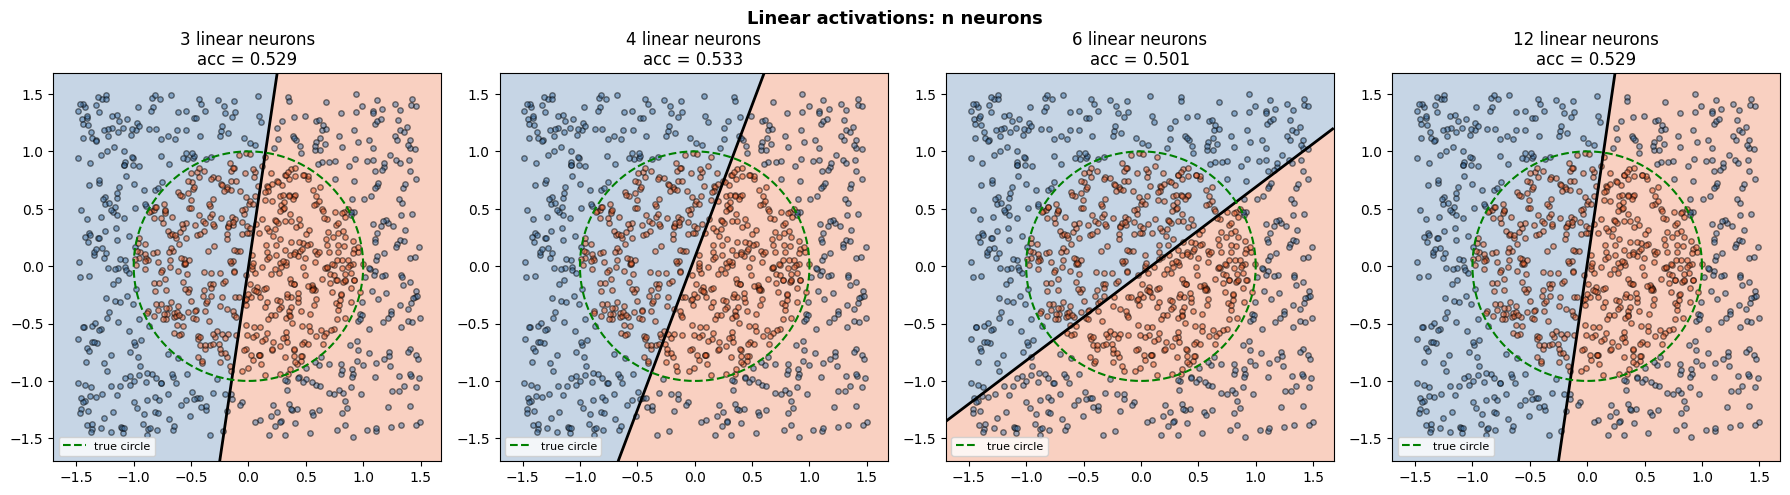

In [35]:
configs = [3, 4, 6, 12]
fig, axes = plt.subplots(1, 4, figsize=(18, 5))

for n, ax in zip(configs, axes):
    m = make_model(n)
    print(f"Computing {n}")
    m.fit(X, y, epochs=20, batch_size=512, verbose=0)
    plot_boundary(m, X, y, f"{n} linear neurons", ax)

plt.suptitle("Linear activations: n neurons",
             fontsize=13, fontweight='bold')
plt.tight_layout()
plt.savefig("./images/circle_boundary.png", dpi=150, bbox_inches='tight')
print("Done.")

## Step Functions

Now replace linear with a true step (0,1) function

In [19]:
# ── 2. Build models with n linear neurons ────────────────────────────────────
@tf.custom_gradient
def step_function(x):
    """Step forward, identity gradient backward."""
    y = tf.where(x > 0, tf.ones_like(x), tf.zeros_like(x))

    def grad(dy):
        # Straight‑through: pretend the derivative is 1 wherever dy flows
        # (you could also return tf.zeros_like(x) if you truly want no gradient)
        return dy  # identity gradient

    return y, grad

    
def make_model(n_neurons):
    model = keras.Sequential([
        keras.layers.Input(shape=(2,)),
        keras.layers.Dense(n_neurons, activation=step_function),
        keras.layers.Dense(1, activation='sigmoid')
    ], name=f"{n_neurons}_linear_neurons")
    model.compile(tf.keras.optimizers.Adam(0.01), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# ── 3. Train and plot ─────────────────────────────────────────────────────────
def plot_boundary(model, X, y, title, ax):
    h = 0.02
    x_min, x_max = -1.7, 1.7
    y_min, y_max = -1.7, 1.7
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid, verbose=0).reshape(xx.shape)

    ax.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.3,
                colors=['#4477AA', '#EE6633'])
    ax.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2)

    # Draw true unit circle for reference
    theta = np.linspace(0, 2*np.pi, 300)
    ax.plot(np.cos(theta), np.sin(theta), 'g--', linewidth=1.5, label='true circle')

    ax.scatter(X[y==0, 0], X[y==0, 1], c='#4477AA', edgecolors='k', s=15, alpha=0.5)
    ax.scatter(X[y==1, 0], X[y==1, 1], c='#EE6633', edgecolors='k', s=15, alpha=0.5)

    _, acc = model.evaluate(X, y, verbose=0)
    ax.set_title(f"{title}\nacc = {acc:.3f}", fontsize=12)
    ax.set_aspect('equal')
    ax.legend(fontsize=8)

Computing 3
Computing 4
Computing 6
Computing 12
Done.


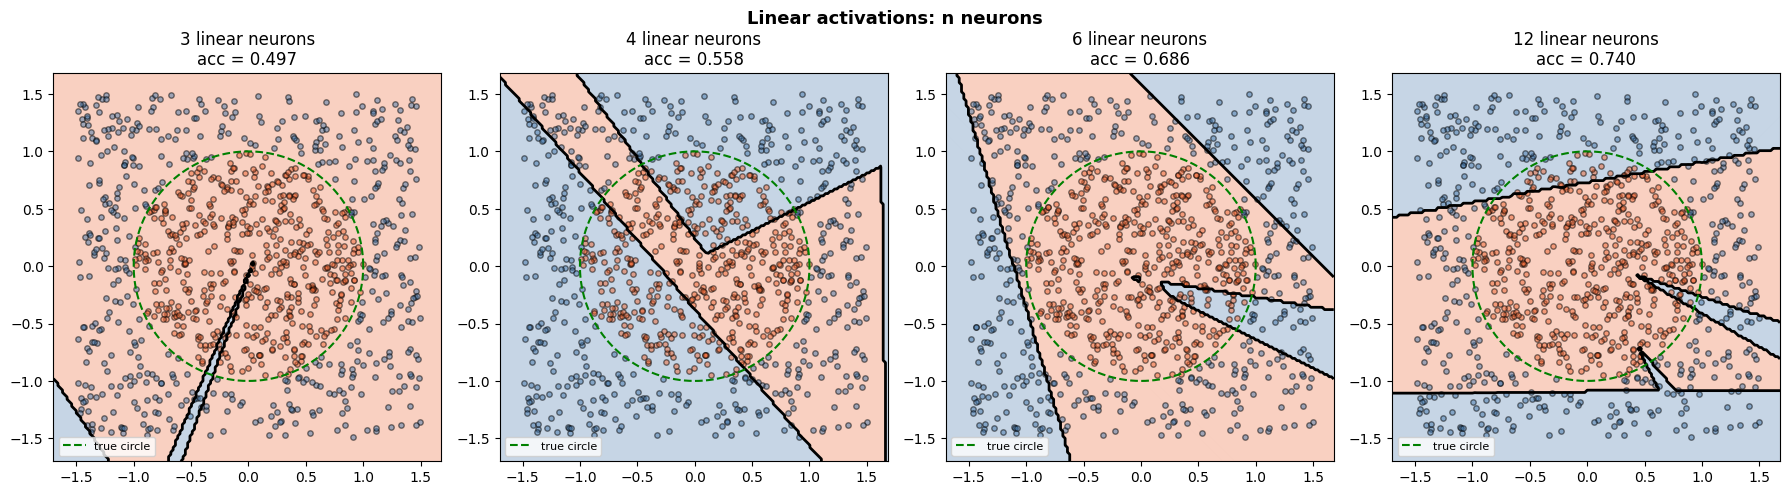

In [21]:
configs = [3, 4, 6, 12]
fig, axes = plt.subplots(1, 4, figsize=(18, 5))

for n, ax in zip(configs, axes):
    m = make_model(n)
    print(f"Computing {n}")
    m.fit(X, y, epochs=1000, batch_size=512, verbose=0)
    plot_boundary(m, X, y, f"{n} linear neurons", ax)

plt.suptitle("Linear activations: n neurons",
             fontsize=13, fontweight='bold')
plt.tight_layout()
plt.savefig("./images/circle_boundary.png", dpi=150, bbox_inches='tight')
print("Done.")

# Sigmoid

And lastly replace step with a nice smooth sigmoid

In [26]:
# ── 2. Build models with n linear neurons ────────────────────────────────────
def make_model(n_neurons):
    model = keras.Sequential([
        keras.layers.Input(shape=(2,)),
        keras.layers.Dense(n_neurons, activation='sigmoid'),
        keras.layers.Dense(1, activation='sigmoid')
    ], name=f"{n_neurons}_linear_neurons")
    model.compile(tf.keras.optimizers.Adam(0.01), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# ── 3. Train and plot ─────────────────────────────────────────────────────────
def plot_boundary(model, X, y, title, ax):
    h = 0.02
    x_min, x_max = -1.7, 1.7
    y_min, y_max = -1.7, 1.7
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid, verbose=0).reshape(xx.shape)

    ax.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.3,
                colors=['#4477AA', '#EE6633'])
    ax.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2)

    # Draw true unit circle for reference
    theta = np.linspace(0, 2*np.pi, 300)
    ax.plot(np.cos(theta), np.sin(theta), 'g--', linewidth=1.5, label='true circle')

    ax.scatter(X[y==0, 0], X[y==0, 1], c='#4477AA', edgecolors='k', s=15, alpha=0.5)
    ax.scatter(X[y==1, 0], X[y==1, 1], c='#EE6633', edgecolors='k', s=15, alpha=0.5)

    _, acc = model.evaluate(X, y, verbose=0)
    ax.set_title(f"{title}\nacc = {acc:.3f}", fontsize=12)
    ax.set_aspect('equal')
    ax.legend(fontsize=8)

Computing 3
Computing 4
Computing 6
Computing 12
Done.


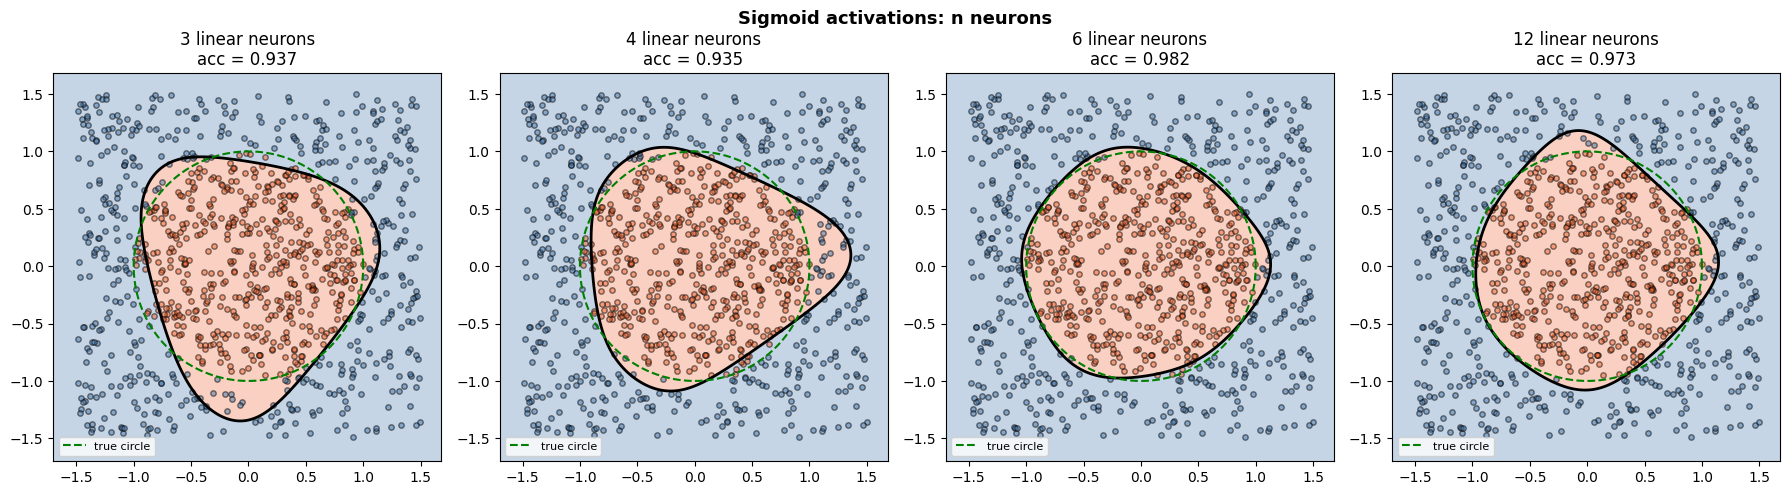

In [31]:
configs = [3, 4, 6, 12]
fig, axes = plt.subplots(1, 4, figsize=(18, 5))

for n, ax in zip(configs, axes):
    m = make_model(n)
    print(f"Computing {n}")
    m.fit(X, y, epochs=100, batch_size=256, verbose=0)
    plot_boundary(m, X, y, f"{n} linear neurons", ax)

plt.suptitle("Sigmoid activations: n neurons",
             fontsize=13, fontweight='bold')
plt.tight_layout()
plt.savefig("./images/circle_boundary.png", dpi=150, bbox_inches='tight')
print("Done.")

Sigmoid *should* be able to get a circle with 4 nodes

Computing 4
Done.


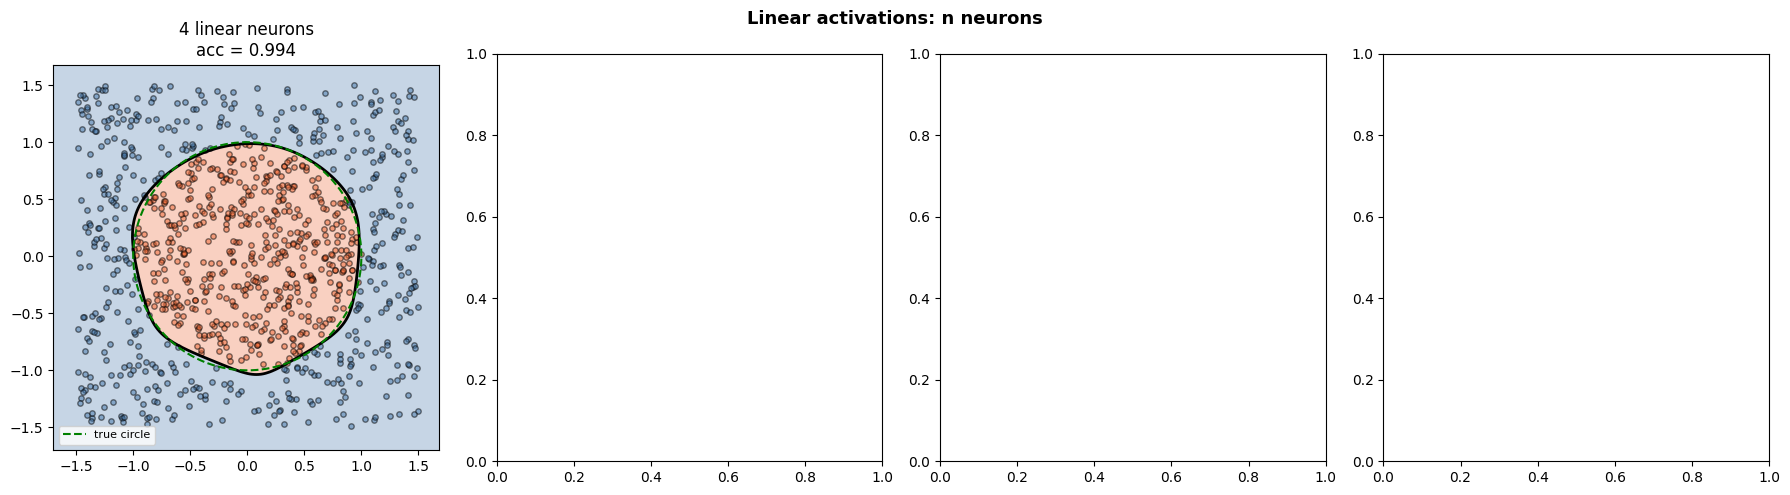

In [28]:
configs = [4]
fig, axes = plt.subplots(1, 4, figsize=(18, 5))

for n, ax in zip(configs, axes):
    m = make_model(n)
    print(f"Computing {n}")
    m.fit(X, y, epochs=1000, batch_size=64, verbose=0)
    plot_boundary(m, X, y, f"{n} linear neurons", ax)

plt.suptitle("Linear activations: n neurons",
             fontsize=13, fontweight='bold')
plt.tight_layout()
plt.savefig("./images/circle_boundary.png", dpi=150, bbox_inches='tight')
print("Done.")

Computing 3
Done.


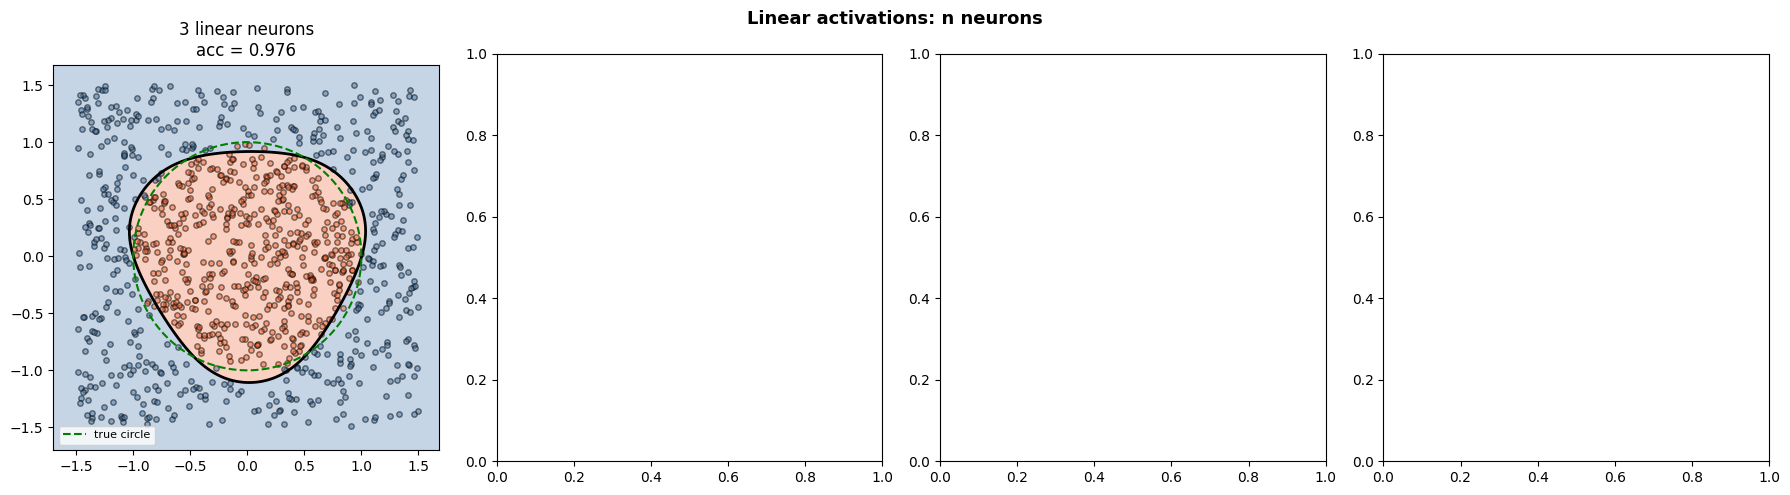

In [30]:
configs = [3]
fig, axes = plt.subplots(1, 4, figsize=(18, 5))

for n, ax in zip(configs, axes):
    m = make_model(n)
    print(f"Computing {n}")
    m.fit(X, y, epochs=1000, batch_size=256, verbose=0)
    plot_boundary(m, X, y, f"{n} linear neurons", ax)

plt.suptitle("Linear activations: n neurons",
             fontsize=13, fontweight='bold')
plt.tight_layout()
plt.savefig("./images/circle_boundary.png", dpi=150, bbox_inches='tight')
print("Done.")